<a href="https://colab.research.google.com/github/madhumitha-r26/DL_Learnings/blob/main/NEP_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "NationalNames.csv"

# Load the latest version
data = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "kaggle/us-baby-names",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-2100985660.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  data = kagglehub.load_dataset(


Using Colab cache for faster access to the 'us-baby-names' dataset.


In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
data.shape

(1825433, 5)

In [51]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


In [52]:
data['Name'].nunique()

93889

In [53]:
data['Gender']=data['Gender'].astype('category').cat.codes



*   female - 0
*   male - 1

In [54]:
df=data.groupby('Name').mean()['Gender'].reset_index()
df

,Name,Gender
0,Aaban,1.0
1,Aabha,0.0
2,Aabid,1.0
3,Aabriella,0.0
4,Aadam,1.0
...,...,...
93884,Zytavious,1.0
93885,Zyvion,1.0
93886,Zyyanna,0.0
93887,Zyyon,1.0


In [55]:
df['Gender']=df['Gender'].astype(int)
df

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1
...,...,...
93884,Zytavious,1
93885,Zyvion,1
93886,Zyyanna,0
93887,Zyyon,1


In [56]:
df.head()

,Name,Gender
0,Aaban,1
1,Aabha,0
2,Aabid,1
3,Aabriella,0
4,Aadam,1


In [57]:
import string
letters=list(string.ascii_lowercase)
letters

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [58]:
r_vocab=dict(zip(range(1,27),letters))
r_vocab

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [59]:
vocab=dict(zip(letters,range(1,27)))
vocab
def word_to_number():
  for i in range(0,df.shape[0]):
    seq=[ vocab[letters.lower()] for letters in df['Name'][i] ]
    df['Name'][i]=seq


In [60]:
word_to_number()

Streaming output truncated to the last 5000 lines.
See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Name'][i]=seq
/tmp/ipython-input-2650386112.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Name'][i]=seq
/tmp/ipython-input-2650386112.py:6: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of 

In [61]:
df.head()

,Name,Gender
0,"[1, 1, 2, 1, 14]",1
1,"[1, 1, 2, 8, 1]",0
2,"[1, 1, 2, 9, 4]",1
3,"[1, 1, 2, 18, 9, 5, 12, 12, 1]",0
4,"[1, 1, 4, 1, 13]",1


In [62]:
x=df['Name'].values
y=df['Gender'].values


histogram

In [65]:
name_length=[len(x[i]) for i in range (0,df.shape[0])]

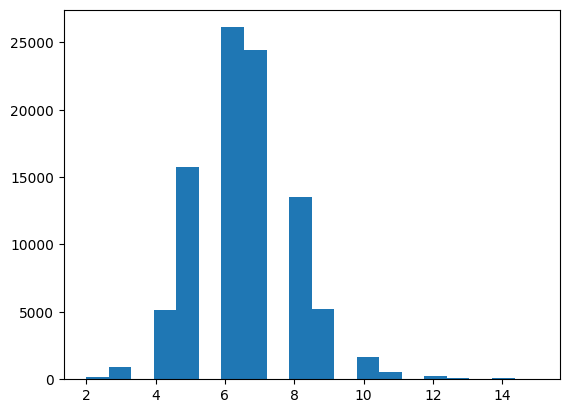

In [68]:
import matplotlib.pyplot as plt
plt.hist(name_length,bins=20)
plt.show()

In [70]:
from keras.preprocessing.sequence import pad_sequences
x=pad_sequences(df['Name'].values,maxlen=10,padding='pre')
x

array([[ 0,  0,  0, ...,  2,  1, 14],
       [ 0,  0,  0, ...,  2,  8,  1],
       [ 0,  0,  0, ...,  2,  9,  4],
       ...,
       [ 0,  0,  0, ..., 14, 14,  1],
       [ 0,  0,  0, ..., 25, 15, 14],
       [ 0,  0,  0, ..., 25, 26, 24]], dtype=int32)

In [71]:
from keras.layers import Input, Embedding, Dense, LSTM
from keras.models import Model

In [74]:
vocab_size=len(vocab)+1
vocab_size

27

In [79]:
inp=Input(shape=(10,))
emn=Embedding(input_dim=vocab_size,output_dim=5)(inp)
lstm1=LSTM(units=32, return_sequences=True)(emn)
lstm2=LSTM(units=64)(lstm1)
out=Dense(units=1,activation='sigmoid')(lstm2)
my_model=Model(inputs=inp,outputs=out)

In [80]:
my_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_1 (Embedding)         │ (None, 10, 5)          │           135 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 32)         │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,896 (116.78 KB)

 Trainable params: 29,896 (116.78 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
my_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [82]:
his=my_model.fit(x,y,epochs=10,batch_size=256,validation_split=0.2)

Epoch 1/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step - accuracy: 0.6963 - loss: 0.5918 - val_accuracy: 0.8117 - val_loss: 0.3983
Epoch 2/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8003 - loss: 0.4144 - val_accuracy: 0.8177 - val_loss: 0.3904
Epoch 3/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 11s 38ms/step - accuracy: 0.8125 - loss: 0.3948 - val_accuracy: 0.8187 - val_loss: 0.3910
Epoch 4/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 19s 35ms/step - accuracy: 0.8158 - loss: 0.3939 - val_accuracy: 0.8233 - val_loss: 0.3896
Epoch 5/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.8165 - loss: 0.3886 - val_accuracy: 0.8246 - val_loss: 0.3838
Epoch 6/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8192 - loss: 0.3846 - val_accuracy: 0.8233 - val_loss: 0.3810
Epoch 7/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.8206 - loss: 0.3813 - val_accuracy: 0.8245 - val_loss: 0.3819
Epoch 8/10
294/294 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.8231 - loss: 0.3785 - v

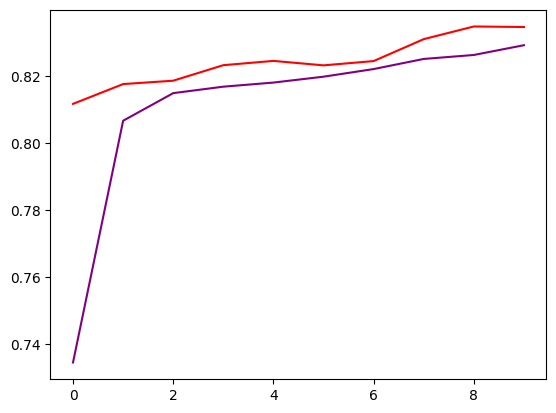

In [85]:
h=his.history
plt.plot(h['accuracy'],c='purple')
plt.plot(h['val_accuracy'],c='red')
plt.show()

In [97]:
name="Madhumitha"
text_name=name.lower()
seq=[vocab[i] for i in text_name]
x_test=pad_sequences([seq],10)
x_test


array([[13,  1,  4,  8, 21, 13,  9, 20,  8,  1]], dtype=int32)

In [98]:
y_pred=my_model.predict(x_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[0.02000907]], dtype=float32)

In [99]:
if(y_pred < 0.5):
  print("Female")
else:
  print("Male")

Female
